In [1]:
import sys
sys.path.append('../')

In [2]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from nn.sdnn import DNN

In [18]:
# https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data
data = np.genfromtxt('data/breast-cancer-wisconsin.data.txt', delimiter=',')
data.shape

(699, 11)

In [19]:
data = data[~np.isnan(data).any(axis=1)] # drop nans
data = data[:, 1:]                       # drop the id field
data.shape

(683, 10)

In [21]:
X = data[:, 0:-1]
y = data[:, -1:] # 2 or 4
X.shape, y.shape

((683, 9), (683, 1))

In [25]:
X[1]

array([ 5.,  4.,  4.,  5.,  7., 10.,  3.,  2.,  1.])

In [26]:
y = np.zeros([len(data), 2])
for i in range(0, len(data)):
    if data[i, -1] == 2:
        y[i, 0] = 0
        y[i, 1] = 1
    else:
        y[i, 0] = 1
        y[i, 1] = 0

In [27]:
X = preprocessing.normalize(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [29]:
X_train[:3]

array([[0.72932496, 0.14586499, 0.43759497, 0.14586499, 0.29172998,
        0.14586499, 0.29172998, 0.14586499, 0.14586499],
       [0.83333333, 0.16666667, 0.16666667, 0.16666667, 0.33333333,
        0.16666667, 0.16666667, 0.16666667, 0.16666667],
       [0.62554324, 0.20851441, 0.20851441, 0.41702883, 0.41702883,
        0.20851441, 0.20851441, 0.20851441, 0.20851441]])

In [30]:
X.shape, y.shape

((683, 9), (683, 2))

In [31]:
N = DNN(shape=[9, 15, 19, 2])
N.train(X_train, y_train)

         Current function value: 16.000002
         Iterations: 75
         Function evaluations: 171
         Gradient evaluations: 160


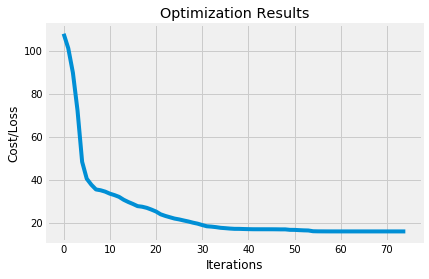

In [32]:
N.plot_cost()

In [33]:
N.compute_accuracy(X_test, y_test)

0.8982300884955752

In [ ]:
N2 = DNN(shape=[9, 25, 35, 8, 2])
N2.train(X_train, y_train)